![Colegio Bourbaki](./Images/Bourbaki.png)

# Procesamiento de Lenguaje Natural

## Preprocesamiento y Vectorización de textos

### Librerias

In [1]:
#Text Processing
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud

#Plotting
import matplotlib.pyplot as plt

#Utils
import re
import pandas as pd

In [2]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/pdconte/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/pdconte/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/pdconte/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

### Funciones de ayuda

In [3]:
def lower_words(text):
    """ Convierte una lista de palabras en minúsculas """
    return text.lower()

In [4]:
def del_stopwords(text, language):
    """ Elimina las stopwords de una lista de palabras """
    stop = re.compile(r'\b(' + r'|'.join(stopwords.words(language)) + r')\b\s*')
    return stop.sub('', text)

In [5]:
def del_punct_nums(text):
  """ Elimina puntuación y números """
  return re.sub('[^a-z]+', ' ', text)

In [6]:
def stemmer(words):
    """Separa por raíz una lista de palabras """
    st = PorterStemmer()
    words = word_tokenize(words) # mismo que words.split()
    return ' '.join([st.stem(word) for word in words])

In [7]:
def lemmatizer(words):
    """ Lematiza una lista de palabras """
    lemmatizer = WordNetLemmatizer()
    words = word_tokenize(words) # mismo que words.split()
    return ' '.join([lemmatizer.lemmatize(word) for word in words])

In [8]:
def preprocessing(text, language, type):
    text = lower_words(text) # Convertir a minúsculas
    text = del_stopwords(text, language) # Eliminar stopwords
    text = del_punct_nums(text) # Quitar puntos y números
    if type == 'lemma':
        text = lemmatizer(text)  # Lemmatizar    
    elif type == 'stem':
        text = stemmer(text) # Stemming
    
    text = [word for word in word_tokenize(text) if len(word) > 2] # Reconstruir el texto con palabras mayores a 2 caracteres
    return ' '.join(text)

In [9]:
def generate_wordcloud(text):
    """ Genera una nube de palabras a partir de una lista de textos """
    
    # Crear la nube de palabras
    wordcloud = WordCloud(max_font_size=50, 
                          max_words=100, 
                          background_color="white", 
                          normalize_plurals=False, 
                          collocations=False).generate(text)
    
    # Desplegar la imagen generada
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

In [10]:
with open('./Data/orthodoxy_chesterton.txt', 'r') as file:
    # Read the entire content of the file into a string
    book = file.read()

In [11]:
book

'\nORTHODOXY\n\nby\n\nGILBERT K. CHESTERTON\n\n\n\n\n\n\n\nPREFACE\n\n\n     This book is meant to be a companion to "Heretics," and to\nput the positive side in addition to the negative.  Many critics\ncomplained of the book called "Heretics" because it merely criticised\ncurrent philosophies without offering any alternative philosophy.\nThis book is an attempt to answer the challenge.  It is unavoidably\naffirmative and therefore unavoidably autobiographical.  The writer has\nbeen driven back upon somewhat the same difficulty as that which beset\nNewman in writing his Apologia; he has been forced to be egotistical\nonly in order to be sincere.  While everything else may be different\nthe motive in both cases is the same.  It is the purpose of the writer\nto attempt an explanation, not of whether the Christian Faith can\nbe believed, but of how he personally has come to believe it.\nThe book is therefore arranged upon the positive principle of a riddle\nand its answer.  It deals first

In [12]:
len(book)

356443

In [13]:
type(book)

str

#### Transformar texto a minúsculas

In [14]:
book_altered = lower_words(book)

In [15]:
book_altered

'\northodoxy\n\nby\n\ngilbert k. chesterton\n\n\n\n\n\n\n\npreface\n\n\n     this book is meant to be a companion to "heretics," and to\nput the positive side in addition to the negative.  many critics\ncomplained of the book called "heretics" because it merely criticised\ncurrent philosophies without offering any alternative philosophy.\nthis book is an attempt to answer the challenge.  it is unavoidably\naffirmative and therefore unavoidably autobiographical.  the writer has\nbeen driven back upon somewhat the same difficulty as that which beset\nnewman in writing his apologia; he has been forced to be egotistical\nonly in order to be sincere.  while everything else may be different\nthe motive in both cases is the same.  it is the purpose of the writer\nto attempt an explanation, not of whether the christian faith can\nbe believed, but of how he personally has come to believe it.\nthe book is therefore arranged upon the positive principle of a riddle\nand its answer.  it deals first

In [16]:
len(book_altered)

356443

#### Quitar puntuación

In [17]:
book_altered = del_punct_nums(book_altered)

In [18]:
book_altered

' orthodoxy by gilbert k chesterton preface this book is meant to be a companion to heretics and to put the positive side in addition to the negative many critics complained of the book called heretics because it merely criticised current philosophies without offering any alternative philosophy this book is an attempt to answer the challenge it is unavoidably affirmative and therefore unavoidably autobiographical the writer has been driven back upon somewhat the same difficulty as that which beset newman in writing his apologia he has been forced to be egotistical only in order to be sincere while everything else may be different the motive in both cases is the same it is the purpose of the writer to attempt an explanation not of whether the christian faith can be believed but of how he personally has come to believe it the book is therefore arranged upon the positive principle of a riddle and its answer it deals first with all the writer s own solitary and sincere speculations and the

In [19]:
len(book_altered)

345196

#### Quitar Palabras Irrelevantes ("Stopwords")

In [20]:
book_altered = del_stopwords(book_altered, 'english')

In [21]:
book_altered

' orthodoxy gilbert k chesterton preface book meant companion heretics put positive side addition negative many critics complained book called heretics merely criticised current philosophies without offering alternative philosophy book attempt answer challenge unavoidably affirmative therefore unavoidably autobiographical writer driven back upon somewhat difficulty beset newman writing apologia forced egotistical order sincere everything else may different motive cases purpose writer attempt explanation whether christian faith believed personally come believe book therefore arranged upon positive principle riddle answer deals first writer solitary sincere speculations startling style suddenly satisfied christian theology writer regards amounting convincing creed least repeated surprising coincidence gilbert k chesterton contents introduction defence everything else ii maniac iii suicide thought iv ethics elfland v flag world vi paradoxes christianity vii eternal revolution viii romance

In [22]:
len(book_altered)

214696

### Reducción de palabras

El proceso de reducir las palabras a su forma base o raíz se conoce como "stemming" o "lemmatización". Ambas técnicas se utilizan en procesamiento del lenguaje natural (PLN) e información textual para simplificar el análisis y la comparación de datos de texto.

Aquí hay una breve explicación de cada uno:

1. Stemming:
        Definición: El stemming implica eliminar sufijos de las palabras para obtener su forma base o raíz.
        Ejemplo: El stemming de la palabra "running" daría como resultado "run".

2. Lemmatización:
        Definición: La lematización implica reducir las palabras a su forma base o forma de diccionario (lema) teniendo en cuenta el contexto y el significado.
        Ejemplo: La lematización de la palabra "running" daría como resultado "running"

La elección entre stemming y lematización depende de su caso de uso específico y requisitos: 

* El stemming es generalmente más rápido y menos complejo, pero puede generar palabras que no son válidas. 

* La lematización, por otro lado, es más informada lingüísticamente y generalmente produce palabras válidas, pero puede ser computacionalmente más costosa.

In [23]:
book_altered_stem = stemmer(book_altered)

In [24]:
book_altered_stem

'orthodoxi gilbert k chesterton prefac book meant companion heret put posit side addit neg mani critic complain book call heret mere criticis current philosophi without offer altern philosophi book attempt answer challeng unavoid affirm therefor unavoid autobiograph writer driven back upon somewhat difficulti beset newman write apologia forc egotist order sincer everyth els may differ motiv case purpos writer attempt explan whether christian faith believ person come believ book therefor arrang upon posit principl riddl answer deal first writer solitari sincer specul startl style suddenli satisfi christian theolog writer regard amount convinc creed least repeat surpris coincid gilbert k chesterton content introduct defenc everyth els ii maniac iii suicid thought iv ethic elfland v flag world vi paradox christian vii etern revolut viii romanc orthodoxi ix author adventur orthodoxi introduct defenc everyth els possibl excus book answer challeng even bad shot dignifi accept duel time ago p

In [25]:
len(book_altered_stem)

189212

In [26]:
book_altered_lemma = lemmatizer(book_altered)

In [27]:
book_altered_lemma

'orthodoxy gilbert k chesterton preface book meant companion heretic put positive side addition negative many critic complained book called heretic merely criticised current philosophy without offering alternative philosophy book attempt answer challenge unavoidably affirmative therefore unavoidably autobiographical writer driven back upon somewhat difficulty beset newman writing apologia forced egotistical order sincere everything else may different motive case purpose writer attempt explanation whether christian faith believed personally come believe book therefore arranged upon positive principle riddle answer deal first writer solitary sincere speculation startling style suddenly satisfied christian theology writer regard amounting convincing creed least repeated surprising coincidence gilbert k chesterton content introduction defence everything else ii maniac iii suicide thought iv ethic elfland v flag world vi paradox christianity vii eternal revolution viii romance orthodoxy ix 

In [28]:
len(book_altered_lemma)

211708

### Preprocesamiento conjunto

Preprocesaremos el texto con la funcion lemmatizer en conjunto

In [29]:
book_preprocessed = preprocessing(book, 'english', 'lemma')

In [30]:
book_preprocessed

'orthodoxy gilbert chesterton preface book meant companion heretic put positive side addition negative many critic complained book called heretic merely criticised current philosophy without offering alternative philosophy book attempt answer challenge unavoidably affirmative therefore unavoidably autobiographical writer driven back upon somewhat difficulty beset newman writing apologia forced egotistical order sincere everything else may different motive case purpose writer attempt explanation whether christian faith believed personally come believe book therefore arranged upon positive principle riddle answer deal first writer solitary sincere speculation startling style suddenly satisfied christian theology writer regard amounting convincing creed least repeated surprising coincidence gilbert chesterton content introduction defence everything else maniac iii suicide thought ethic elfland flag world paradox christianity vii eternal revolution viii romance orthodoxy authority adventur

In [31]:
len(book_preprocessed)

210974

### Visualizar palabras

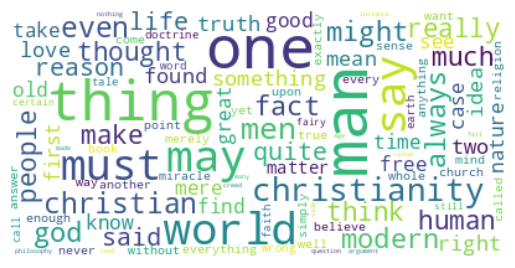

In [32]:
generate_wordcloud(book_preprocessed)

Podemos notar algunas palabras relevantes como 'christiany', 'christian', 'religion', 'god'. Seguramente el cuento tenga que ver con estas cuestiones

### Encajes y Vectorización de textos

**Encaje de palabras (Word Embedding)**


El encaje de palabras es una técnica en procesamiento del lenguaje natural (PLN) que asigna representaciones numéricas a las palabras de un vocabulario. 

Estas representaciones, también conocidas como vectores de palabras, capturan las relaciones semánticas y sintácticas entre las palabras. Ejemplos comunes son BoW, TF-IDF, CBOW, Word2Vec, GloVe o encajes preentrenados como FastText. 

Por lo tanto, nos permiten que las palabras similares tengan vectores cercanos en el espacio, facilitando así la captura de significados y contextos semánticos.

**Vectorización**

La vectorización en PLN se refiere al proceso de convertir texto en vectores numéricos para que los algoritmos de aprendizaje automático puedan procesarlo. 

Puede incluir encaje de palabras, pero también se refiere a técnicas más amplias, como la representación vectorial de documentos o frases.

En este notebook haremos hincapié solamente en BoW y TF-IDF.

**Bolsa de palabras (Bag of Words - BoW)**

BoW es una técnica de vectorización que representa un documento como un conjunto desordenado de palabras y su frecuencia en ese documento. 

Cada palabra se asigna a una posición única en un vector, y el valor en esa posición indica cuántas veces aparece esa palabra en el documento. 

***BoW no captura el orden de las palabras ni las relaciones semánticas, pero es simple y efectivo para tareas básicas.***

**Frecuencia del termino - Frecuencia Inversa del documento (Term Frequency-Inverse Document Frequency - TF-IDF)**

TF-IDF es otra técnica de vectorización que mejora BoW al considerar no solo la frecuencia de una palabra en un documento (TF) sino también la importancia relativa de esa palabra en el contexto de todo el corpus (IDF). 

La puntuación TF-IDF de una palabra aumenta a medida que aparece más en un documento, pero disminuye si la palabra es común en muchos documentos del corpus. 

TF-IDF ayuda a destacar palabras importantes para un documento específico.

En resumen, el encaje de palabras busca representar palabras con vectores numéricos que capturan sus relaciones semánticas, mientras que la vectorización se refiere al proceso más amplio de convertir texto en vectores. 

BoW y TF-IDF son técnicas específicas de vectorización: BoW se basa en contar la frecuencia de palabras, mientras que TF-IDF considera la importancia relativa de las palabras en el contexto del corpus.

#### Vectorización con BoW

In [33]:
bow_vectorizer = CountVectorizer() #Pueden pasarle a la clase múltiples parámetros. Explorar en scikit-learn

In [34]:
BOW = bow_vectorizer.fit_transform(word_tokenize(book_preprocessed))

In [35]:
BOW.shape

(29661, 5698)

In [36]:
bow_words = bow_vectorizer.get_feature_names_out()
pd.DataFrame(BOW.todense(), columns = bow_words)

,abandoned,abbey,abject,able,ablest,abnegation,abnormal,abnormality,abnormally,abolition,...,yeats,yellow,yes,yesterday,yet,yokel,young,younger,youth,zola
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29657,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29658,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29659,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Vectorización con TF-IDF

In [37]:
tfidf_vectorizer = TfidfVectorizer() #Pueden pasarle a la clase múltiples parámetros. Explorar en scikit-learn

In [38]:
tfidf = tfidf_vectorizer.fit_transform(word_tokenize(book_preprocessed))

In [39]:
tfidf.shape

(29661, 5698)

In [40]:
tfidf_words = tfidf_vectorizer.get_feature_names_out()
pd.DataFrame(tfidf.todense(), columns = tfidf_words)

,abandoned,abbey,abject,able,ablest,abnegation,abnormal,abnormality,abnormally,abolition,...,yeats,yellow,yes,yesterday,yet,yokel,young,younger,youth,zola
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29656,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29657,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29658,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29659,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**Recordar: BOW son números enteros, TF-IDF son numeros reales**

### Ejercicios

* Explorar las clases CountVectorizer y TfidfVectorizer en scikit-learn para entenderlas más en profundidad y conocer los parámetros que se les pueden suministrar.

* Realizar el mismo procedimiento con el cuento "Pedro Páramo" de Juan Ruffo. Tener en cuenta que el mismo se encuentra en español.

![Colegio Bourbaki](./Images/Matematicas.png)

![Colegio Bourbaki](./Images/Contacto.png)